Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8069 - loss: 0.4981 - val_accuracy: 0.9009 - val_loss: 0.2496
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9321 - loss: 0.1812 - val_accuracy: 0.8869 - val_loss: 0.2748
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9563 - loss: 0.1320 - val_accuracy: 0.8809 - val_loss: 0.3092
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9664 - loss: 0.1075 - val_accuracy: 0.8809 - val_loss: 0.3503
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9771 - loss: 0.0781 - val_accuracy: 0.8717 - val_loss: 0.4045
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9867 - loss: 0.0548 - val_accuracy: 0.8731 - val_loss: 0.4756
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9930 - loss: 0.0347 - val_accuracy: 0.8671 - val_loss: 0.5433
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9968 - loss: 0.0178 - val_accu

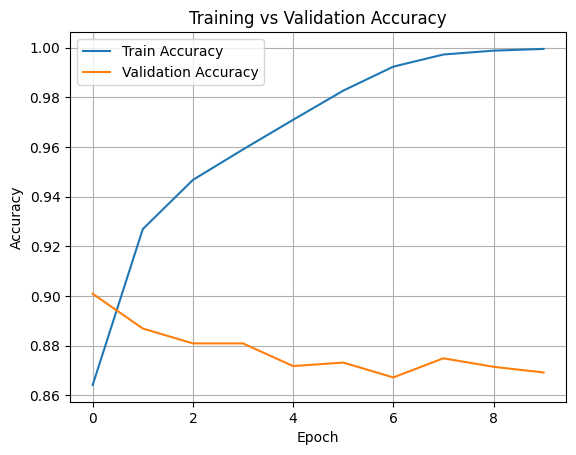

In [ ]:
#movie review analysis idmb 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

df = pd.read_csv("/content/IMDB Dataset.csv", engine='python', encoding='utf-8', on_bad_lines='skip')


# Convert sentiment to binary labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Features and target
X = df['review']
y = df['sentiment']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_test_vect = vectorizer.transform(X_test).toarray()

# Build the model
model = models.Sequential([
    layers.Input(shape=(X_train_vect.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vect, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test_vect).flatten()
y_pred_cls = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test, y_pred_cls)
recall = recall_score(y_test, y_pred_cls)
f1 = f1_score(y_test, y_pred_cls)
_, accuracy = model.evaluate(X_test_vect, y_test, verbose=0)

print(f"\n📊 Classification Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
